In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Heart failure clinical records exploring

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

> https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+reco

I already used this dataset during the first optional set. I found there that this dataset is better for classification than for presenting relationships between data.

In the basic classes, we relied on peer-review data to create our classifications, while here I wanted to deal with both numeric and categorical data.

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
cr_categorical_df = ['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex', 'DEATH_EVENT']
cr_numerical_df = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 
                   'serum_sodium', 'time']

In [4]:
df[cr_numerical_df].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Comment
Above is a description of numerical data which I add as a reminder. We see that on average a person with heart failure is 61 years old and their duration of medical care was 130 days. Also average the percentage of blood leaving the heart with each contraction was 38.

<AxesSubplot:>

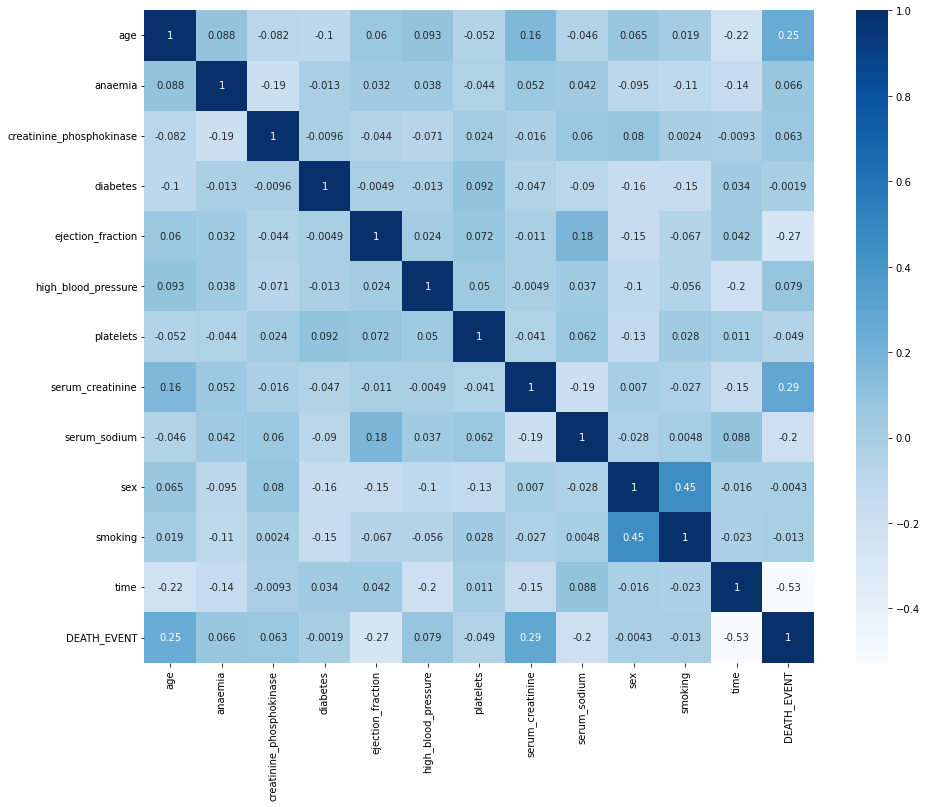

In [5]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size':10}, cmap='Blues')

### Comment
In the chart above, we can observe whether there are any correlations between the data. We can see here that the follow-up period is highly negatively correlated with the information whether a given person has died. On the other hand, we can see a positive relationship between the age and gender of the observed person.

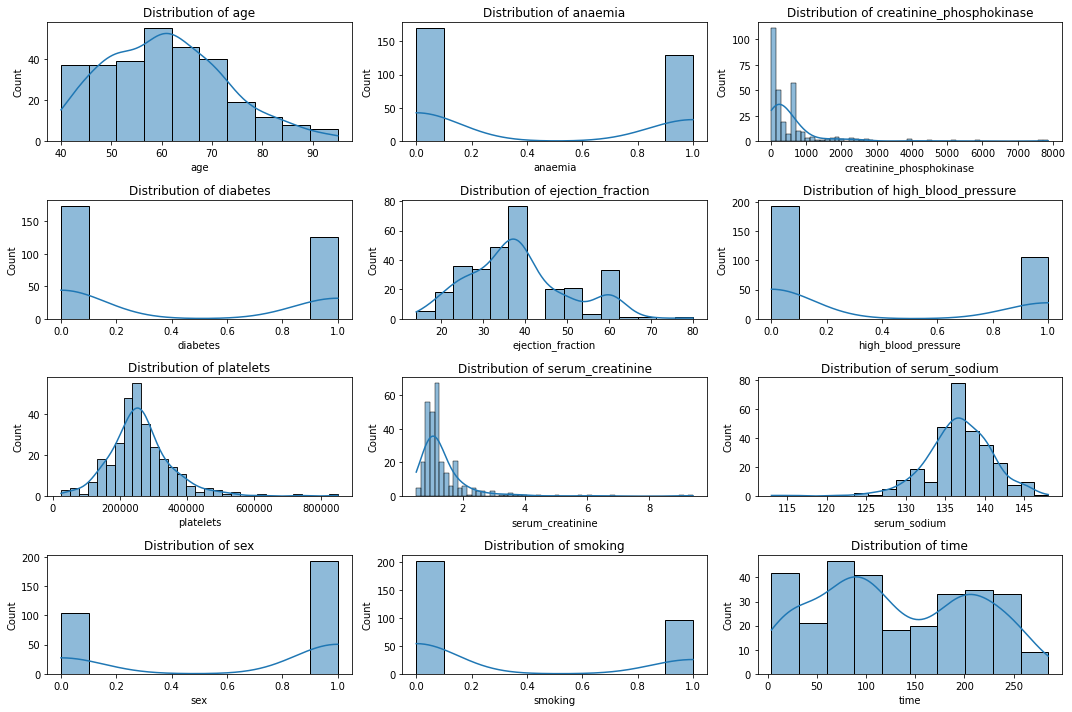

In [6]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

### Comment
As we can see our data depending on the column are skewed. This will be important when selecting a scaler for the data later.

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Comment
Our data doesn't have any missing information so we don't have to worry about that.

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

x_train = train_df.drop('DEATH_EVENT', axis=1)
x_test = test_df.drop('DEATH_EVENT', axis=1)

y_train = train_df['DEATH_EVENT'].values
y_test = test_df['DEATH_EVENT'].values

### Comment
First, I divided the dataset into datasets that we will train our models on and test data that will show us how good our models are.

## Logistic Regression

In [9]:
model = LogisticRegression(max_iter=150)

### Without scaling 

In [10]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.9%]


### Comment
Here I used logistic regression model to learn and predict our sentiment. We can observe that without scalling the model accurancy is quite good. Experts say that anything greater than 70% is a great model performance. "In fact, an accuracy measure of anything between 70%-90% is not only ideal, it’s realistic. This is also consistent with industry standards."

### Min-Max scaler

Transform features by scaling each feature to a given range. This Scaler usually shrinks the data within the range of 0 to 1 and of -1 to 1 if there are negative values.

$$x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

model.fit(x_train_scal, y_train)
prediction = model.predict(x_test_scal)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.867%]


### Comment
We can see that in the case of our data, using this scaler still gave a satisfactory result, but worse than the model on data without scaling. As we can see our data has varoius std (bigger and smaller) and this scaler responds well if the standard deviation is small.

### Standard Scaler

Assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a std of 1. Centering and scaling happen independently on each feature. If data is not normally distributed, this is not the best scaler to use.

$$x_{new} = \frac{x - \mu}{\sigma}$$

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

model.fit(x_train_scal, y_train)
prediction = model.predict(x_test_scal)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.883%]


### Comment
Using this scaler gave us the better model result than MinMax scaller, even though the distribution of the data are skewed a bit.    

### Max Abs Scaler

Scale each feature by it maximum absolute value. It doesn't shift the data so doesn't destroy any sparsity.

In [13]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

model.fit(x_train_scal, y_train)
prediction = model.predict(x_test_scal)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.9%]


### Comment
Although the Abs scaler for positive data behaves similarly to Min Max, the results we got from it are better by more than 4 percentage points.

### Robust Scaler
This scaler is resistant to outliers. If our data contains many outliers, scaling using the mean and std of the data won’t work well. Scaler removes the median and scales the data according to the range between the 1st quartile and the 3rd quartile. Outliers themselves are still present in the transformed data.

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

model.fit(x_train_scal, y_train)
prediction = model.predict(x_test_scal)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.883%]


### Comment
Another good result obtained using the scaler above. As our data does not have a large number of outliers, the difference between Standard scaler and Robust is very small (in our case, both results are identical).

## Decision tree

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [15]:
dec_tree=DecisionTreeClassifier(criterion="entropy", random_state=2)

### Comment
Here I created decision tree classifier model with entropy function to measure the quality of a split. Random state again has the same meaning - we can get a different result each time, so we introduce a seed to get the same result. 

### Without scaling data

In [16]:
fited = dec_tree.fit(x_train, y_train)

prediction = dec_tree.predict(x_test)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.883%]


### Comment
The precision we have using the decision tree is comparable to logistic regression in our case.

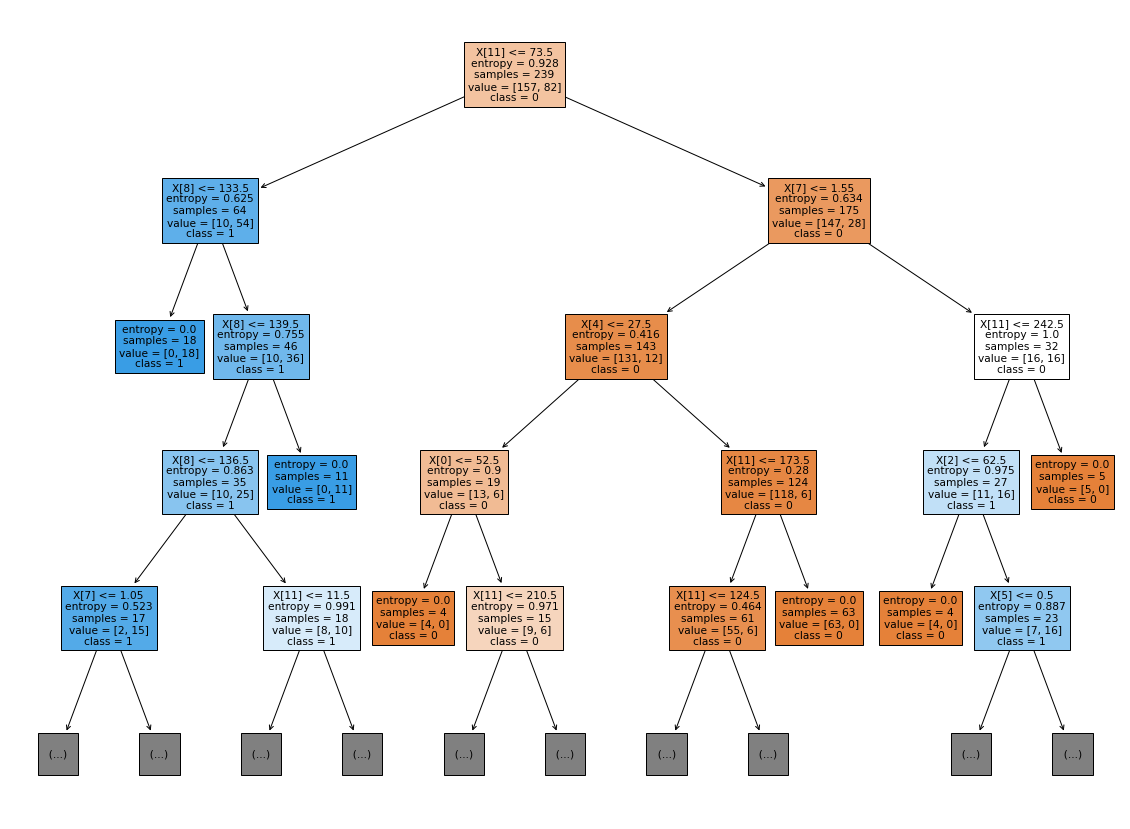

In [17]:
plt.figure(figsize=(20,15))
plot_tree(fited, class_names=['0', '1'], filled=True, max_depth=4);

### Comment
Above is the visualization of decison tree classification model. We can obsere here the decison nodes and the leaf nodes where the entropy is equal to 0. The entropy determines how a decision tree chooses to split data. If it split the data that it will be in the same class we will get the entropy equals to 0.

### With scaling data 

In [18]:
### MinMax
scaler = MinMaxScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

dec_tree.fit(x_train_scal, y_train)
prediction = dec_tree.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with MinMaxScaler")

### Standard
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

dec_tree.fit(x_train_scal, y_train)
prediction = dec_tree.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with StandardScaler")

### MaxAbs
scaler = MaxAbsScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

dec_tree.fit(x_train_scal, y_train)
prediction = dec_tree.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with MaxAbsScaler")

### Robust
scaler = RobustScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

dec_tree.fit(x_train_scal, y_train)
prediction = dec_tree.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with RobustScaler")

Model accuracy [0.883%] with MinMaxScaler
Model accuracy [0.883%] with StandardScaler
Model accuracy [0.883%] with MaxAbsScaler
Model accuracy [0.883%] with RobustScaler


### Comment
As we can see using different scalers doesn't change our model performance. The answer is very simple, tree-based algorithms are insensitive to the scale of the features. Decision tree is only spliting a nodes based on a single feature. 

## Random Forest

This algorithm grows and combines multiple decision trees to create a forest. Each tree predict class and the class with the most votes becomes model prediction. An important element is that the trees can't be correlated with each other. This is ensured by random data splitting and random features on which the tree creates a classification.

In [19]:
random = RandomForestClassifier(criterion='entropy', random_state=19)

### Comment
Here I created decision tree classifier model with entropy function to measure the quality of a split.

### Without data scaling

In [20]:
random.fit(x_train, y_train)

prediction = random.predict(x_test)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.933%]


### Comment
Using a forest of decision trees, we obtained the best result from all models.

### With data scaling

In [21]:
### Standard
scaler = MaxAbsScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

random.fit(x_train_scal, y_train)
prediction = random.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with MaxAbsScaler")

### Robust
scaler = RobustScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

random.fit(x_train_scal, y_train)
prediction = random.predict(x_test_scal)
print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%] with RobustScaler")

Model accuracy [0.933%] with MaxAbsScaler
Model accuracy [0.933%] with RobustScaler


### Comment 
Situation as with decision tree. This algorithm is independant of the scale of the data. Forest is created from trees and trees are independant so forest is independant too.

## Implementation of Logistic Regression model

We are not able to use linear regression to predict the classification of a given problem because its model takes values in the infinite range. We need something that will show us values between 0 and 1 (our probability). For this purpose, we use a sigmoidal function on a linear regression function model.

This logistic function is called sigmoid and have the form:

$$sigmoid(score) = \frac{1}{1+e^{-score}}$$

This function estimates probabilities between 0 and 1, and as logistic regression is a nonlinear transformation that looks like S.

And after activating it with our linear function $score = wx+b$ we have following formula for predicting out values.

$$sigmoid(x) = \frac{1}{1+e^{-wx+b}}$$


In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def classify(prediction):
    return np.where(prediction > 0.5, 1, 0)   

### Comment
I have prepared two helper functions here. The first function is our sigmoid while the second function we will use to classify our case based on a given probability.

In [23]:
def fit(x, y, it, lr):
    rows, cols = x.shape

    weights = np.zeros(cols)
    bias = 0
    
    for i in range(it):
        linear = np.dot(x, weights) + bias
        prediction = sigmoid(linear)
        
        # calculate change
        weight_change = np.dot(x.T, (prediction - y)) / rows
        bias_change = np.sum(prediction - y) / rows
        
        # update model
        weights = weights - (lr * weight_change)
        bias = bias - (lr * bias_change)
        
    return weights, bias

### Comment
This function create the model on our training data. It uses gradient method to compute the best weights. To compute our gradient step we have the production of our data and the difference between real values and the predictions.

In [24]:
def predict(x, weights, bias):
    linear = np.dot(x, weights) + bias
    prediction = sigmoid(linear)
    return classify(prediction)

### Comment
This function for a given data classify each record for one of our two classes 0 and 1.

In [25]:
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

w, b = fit(x_train_scal, y_train, 500, 0.3)
prediction = predict(x_test_scal, w, b)

print(f"Model accuracy [{round(accuracy_score(y_test, prediction), 3)}%]")

Model accuracy [0.867%]


### Comment 
As we can see few lines of code and some basic mathematic function can help us to implement from scratch logistic regression model to classify our data. And as we can also notice the model performance is quite good.